# Trajectory of order 0 on CCD
==================================================================================================

- author : Sylvie
- creation date   : November 5th th2017
- update : November 6th 2017
- Version : 1.0


The goal of this notebook is to study show the order 0 moves over CCD plate. Pointing ins not perfect.



#### problem because limitation in output of data

- firt I tried to generate a config file for jupyter

If you ran jupyter notebook --generate-config to create it, it should be in the correct place already. If not, try putting it at ~/.jupyter/jupyter_notebook_config.py

- and I set : 
> c.NotebookApp.iopub_data_rate_limit = 1000000

but it failed again so I launch jupyter as follow:

> jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000 Ana2DShapeSpectra.ipynb

So it behaves better

In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

Ana2DTrajectory
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_30may17/HD205905


In [4]:
from astropy.modeling import models, fitting

In [5]:
import pandas as pd

# Flags

In [6]:
ShowAllImageFlag=False
ShowAllImageFirstOrderFlag=False
ShowAllImageZeroOrderFlag=False

# Input directory

In [7]:
#inputdir="../OverScanRemove/trim_images"
#inputdir="../../data/CTIODataJune2017_reducedRed/data_05jun17/"
inputdir="./rotated_fitsimages"
MIN_IMGNUMBER=208
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "rotimg"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

# Output directory

In [8]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

#outputdir="./spectrum_fitsspec"
#ensure_dir(outputdir)

# Open files
===================================

## order 0 position in original image

In [9]:
df=pd.read_csv('xy_pointing.csv')
x_star=df["x_pointing"]
y_star=df["y_pointing"]
all_theta=df["theta"]
x_pointing=x_star
y_pointing=y_star

In [10]:
order0_positions = np.array([x_pointing,y_pointing]).T

In [11]:
df.head()

,Unnamed: 0,theta,x_pointing,y_pointing
0,0,-0.687854,777.817052,697.213424
1,1,-0.698755,778.828008,699.389248
2,2,-0.967711,778.262882,698.021874
3,3,-1.901504,779.395173,697.163867
4,4,-1.508646,778.822621,697.404092


## order 0 position in rotated and cut image

In [12]:
df2=pd.read_csv('x_y_guess2.csv')
x_star2=df2["x_guess2"]
y_star2=df2["y_guess2"]
order0_positions2 = np.array([x_star2,y_star2]).T

In [13]:
df2.head()

,Unnamed: 0,theta,x_guess2,y_guess2
0,0,-0.687854,780.343885,209.762862
1,1,-0.698755,781.389391,209.911508
2,2,-0.967711,781.320275,213.275796
3,3,-1.901504,785.571728,226.037917
4,4,-1.508646,783.974976,220.969146


## Input image files

- rotated and cut images

In [14]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe) 
all_dates,all_airmass,all_images,all_titles,all_header,all_expo,all_filt,all_filt1,all_filt2=BuildImages(sorted_files,sorted_numbers,object_name)

print 'Number of images:',len(all_images)
print all_images[0].shape

Number of images: 75
(400, 2048)


In [15]:
print all_filt

['dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400

## Show filters and dispersers

In [16]:
Filt_names

['dia Ron400',
 'dia Thor300',
 'dia HoloPhP',
 'dia HoloPhAg',
 'dia HoloAmAg',
 'dia Ron200',
 'Unknown']

In [17]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [18]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70]
dia Thor300  	 : filt1_idx ::  [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71]
dia HoloPhP  	 : filt2_idx ::  [ 2  7 12 17 22 27 32 37 42 47 52 57 62 67 72]
dia HoloPhAg  	 : filt3_idx ::  [ 3  8 13 18 23 28 33 38 43 48 53 58 63 68 73]
dia HoloAmAg  	 : filt4_idx ::  [ 4  9 14 19 24 29 34 39 44 49 54 59 64 69 74]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [19]:
print Filt_names[0],filt0_idx
print Filt_names[1],filt1_idx
print Filt_names[2],filt2_idx
print Filt_names[3],filt3_idx
print Filt_names[4],filt4_idx
print Filt_names[5],filt5_idx
print Filt_names[6],filt6_idx

dia Ron400 [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70]
dia Thor300 [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71]
dia HoloPhP [ 2  7 12 17 22 27 32 37 42 47 52 57 62 67 72]
dia HoloPhAg [ 3  8 13 18 23 28 33 38 43 48 53 58 63 68 73]
dia HoloAmAg [ 4  9 14 19 24 29 34 39 44 49 54 59 64 69 74]
dia Ron200 []
Unknown []


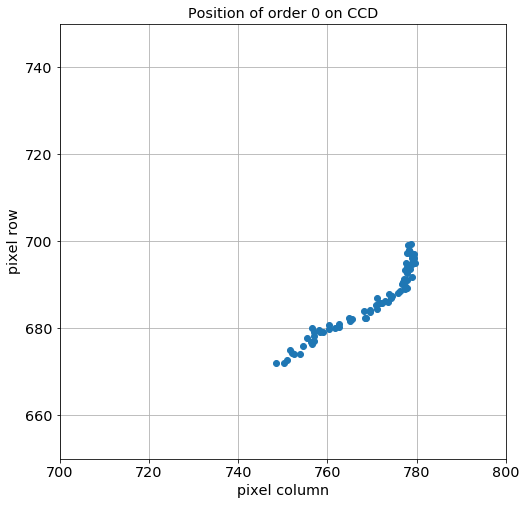

In [20]:
plt.figure(figsize=(8,8))
plt.plot(x_star,y_star,'o')
plt.xlim(700.,800.)
plt.ylim(650.,750.)
plt.xlabel('pixel column')
plt.ylabel('pixel row')
plt.grid(True)
plt.title("Position of order 0 on CCD")

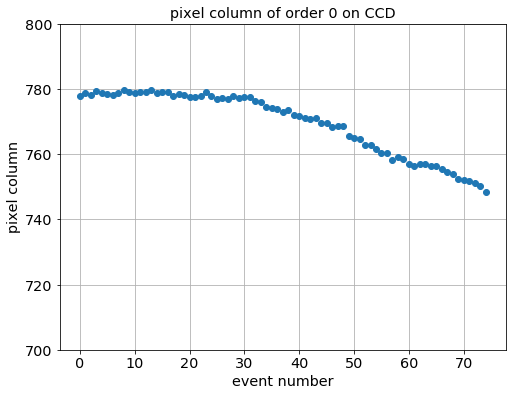

In [21]:
plt.figure(figsize=(8,6))
plt.plot(x_star,'o')
plt.ylim(700.,800.)
plt.ylabel('pixel column')
plt.xlabel('event number')
plt.grid(True)
plt.title("pixel column of order 0 on CCD")

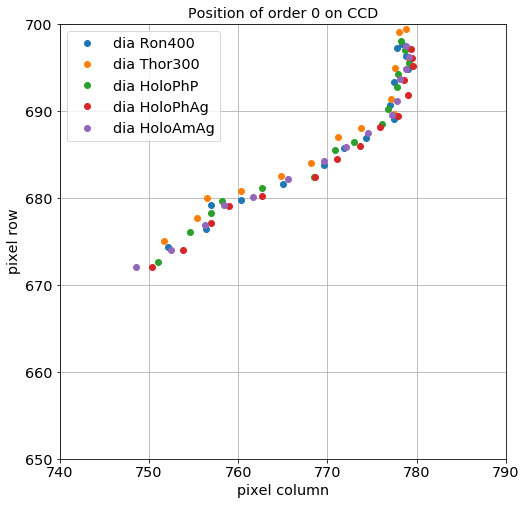

In [25]:
plt.figure(figsize=(8,8))
plt.plot(x_star[filt0_idx],y_star[filt0_idx],'o',label=Filt_names[0])
plt.plot(x_star[filt1_idx],y_star[filt1_idx],'o',label=Filt_names[1])
plt.plot(x_star[filt2_idx],y_star[filt2_idx],'o',label=Filt_names[2])
plt.plot(x_star[filt3_idx],y_star[filt3_idx],'o',label=Filt_names[3])
plt.plot(x_star[filt4_idx],y_star[filt4_idx],'o',label=Filt_names[4])
plt.xlim(740.,790.)
plt.ylim(650.,700.)
plt.xlabel('pixel column')
plt.ylabel('pixel row')
plt.grid(True)
plt.legend()
plt.title("Position of order 0 on CCD")
filename=os.path.join(dir_top_images,'trajectory.pdf')
plt.savefig(filename)

# Example of colorbar

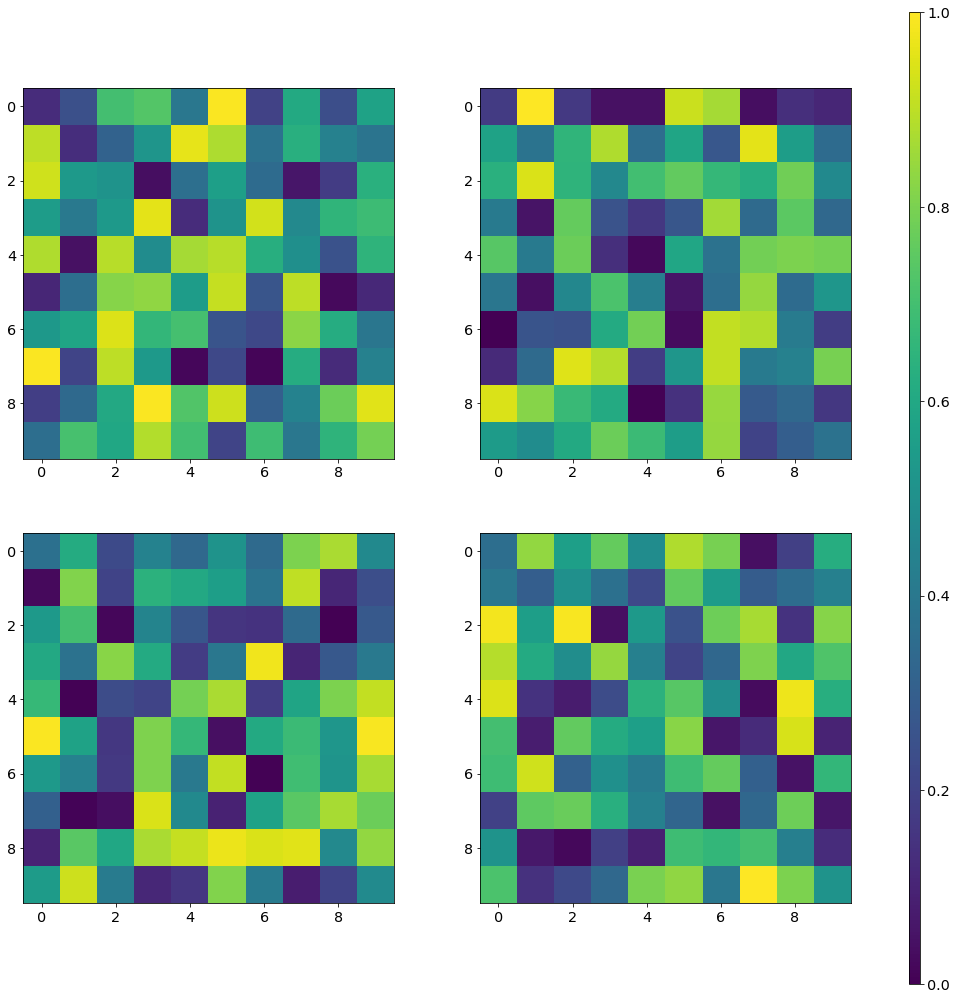

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1)

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.05, 0.01, 0.9])
fig.colorbar(im, cax=cbar_ax)

plt.show()